In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from vega_datasets import data


In [2]:
df = data.sf_temps()

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
print(type(df.date))

df.date = pd.to_datetime(df.date)

df.info()
df.head()


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df = df.set_index(df.date)

df.head()

,temp,date
date,,
2010-01-01 00:00:00,47.8,2010-01-01 00:00:00
2010-01-01 01:00:00,47.4,2010-01-01 01:00:00
2010-01-01 02:00:00,46.9,2010-01-01 02:00:00
2010-01-01 03:00:00,46.5,2010-01-01 03:00:00
2010-01-01 04:00:00,46.0,2010-01-01 04:00:00


In [5]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month_name()
df['weekday'] = df.date.dt.day_name()

df.head()

,temp,date,year,month,weekday
date,,,,,
2010-01-01 00:00:00,47.8,2010-01-01 00:00:00,2010,January,Friday
2010-01-01 01:00:00,47.4,2010-01-01 01:00:00,2010,January,Friday
2010-01-01 02:00:00,46.9,2010-01-01 02:00:00,2010,January,Friday
2010-01-01 03:00:00,46.5,2010-01-01 03:00:00,2010,January,Friday
2010-01-01 04:00:00,46.0,2010-01-01 04:00:00,2010,January,Friday


In [10]:
df.isna().sum()

temp       0
date       0
year       0
month      0
weekday    0
dtype: int64

In [6]:
df = df.drop(columns= ['date'])
df.head()

,temp,year,month,weekday
date,,,,
2010-01-01 00:00:00,47.8,2010,January,Friday
2010-01-01 01:00:00,47.4,2010,January,Friday
2010-01-01 02:00:00,46.9,2010,January,Friday
2010-01-01 03:00:00,46.5,2010,January,Friday
2010-01-01 04:00:00,46.0,2010,January,Friday


1. Resample by the day and take the average temperature. Visualize the average temperature over time.
1. Write the code necessary to visualize the minimum temperature over time.
1. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

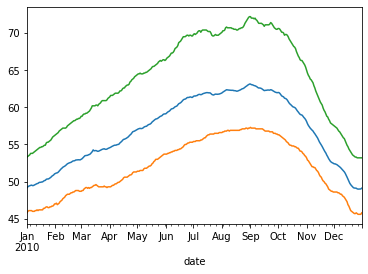

In [7]:
df.resample('D').temp.mean().plot()
df.resample('D').temp.min().plot()
df.resample('D').temp.max().plot()

4. Which month is the coldest, on average?


In [19]:
df.resample('M').temp.mean().idxmin().month_name()


'January'

5. Which month has the highest average temperature?


In [29]:
df.resample('M').temp.mean().idxmax().month_name()

'September'

6. Resample by the day and calculate the min and max temp for the day.

In [25]:
df['day_min'] = df.resample('D').temp.min()
df['day_max'] = df.resample('D').temp.max()
df_min_max = df[(df.day_min.notna()) & (df.day_max.notna())]

df_min_max.sample(100)

,temp,year,month,weekday,day_min,day_max
date,,,,,,
2010-05-17,53.8,2010,May,Monday,52.4,65.4
2010-01-21,48.6,2010,January,Thursday,46.5,54.9
2010-01-22,48.7,2010,January,Friday,46.6,55.2
2010-11-04,54.7,2010,November,Thursday,52.6,64.1
2010-11-26,50.8,2010,November,Friday,48.9,58.2
...,...,...,...,...,...,...
2010-01-04,48.1,2010,January,Monday,46.1,53.6
2010-04-17,52.4,2010,April,Saturday,50.6,62.6
2010-04-02,51.4,2010,April,Friday,49.3,61.6


In [30]:
seattle_wx = data.seattle_weather()

seattle_wx.info()
seattle_wx.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [31]:
seattle_wx.date = pd.to_datetime(seattle_wx.date)
seattle_wx['week_day'] = seattle_wx.date.dt.day_name()
seattle_wx['month'] = seattle_wx.date.dt.month_name()
seattle_wx['year'] = seattle_wx.date.dt.year


In [32]:
seattle_wx = seattle_wx.set_index(seattle_wx.date)
seattle_wx.info()
seattle_wx.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   week_day       1461 non-null   object        
 7   month          1461 non-null   object        
 8   year           1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 114.1+ KB


,date,precipitation,temp_max,temp_min,wind,weather,week_day,month,year
date,,,,,,,,,
2012-01-01,2012-01-01,0.0,12.8,5.0,4.7,drizzle,Sunday,January,2012
2012-01-02,2012-01-02,10.9,10.6,2.8,4.5,rain,Monday,January,2012
2012-01-03,2012-01-03,0.8,11.7,7.2,2.3,rain,Tuesday,January,2012
2012-01-04,2012-01-04,20.3,12.2,5.6,4.7,rain,Wednesday,January,2012
2012-01-05,2012-01-05,1.3,8.9,2.8,6.1,rain,Thursday,January,2012
